In [1]:
!apt-get install gcc-4.8 gcc-5 g++-4.8 g++-5
!apt-get install libblas-dev liblapack-dev
!apt-get install libopenblas-dev
!apt-get install gfortran-4.8
!apt-get install gfortran-5
!apt-get install scons
!apt-get install libpng-dev
!apt-get install libboost-all-dev freeglut3-dev
!apt-get install xvfb
!apt-get install libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-4.8 cpp-5 gcc-4.8-base gcc-5-base libasan0 libasan2 libgcc-4.8-dev
  libgcc-5-dev libisl15 libmpx0 libstdc++-4.8-dev libstdc++-5-dev
Suggested packages:
  gcc-4.8-locales gcc-5-locales g++-4.8-multilib gcc-4.8-doc
  libstdc++6-4.8-dbg g++-5-multilib gcc-5-doc libstdc++6-5-dbg
  gcc-4.8-multilib libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg
  libasan0-dbg libtsan0-dbg libquadmath0-dbg gcc-5-multilib libasan2-dbg
  liblsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg libstdc++-4.8-doc
  libstdc++-5-doc
The following NEW packages will be installed:
  cpp-4.8 cpp-5 g++-4.8 g++-5 gcc-4.8 gcc-4.8-base gcc-5 gcc-5-base libasan0
  libasan2 libgcc-4.8-dev libgcc-5-dev libisl15 libmpx0 libstdc++-4.8-dev
  libstdc++-5-dev
0 upgraded, 16 newly installed, 0 to remove and 15 not upgraded.
Need to get 58.3 MB of archives.
After this operati

In [2]:
!pip install torch==1.3.0 rtree trimesh

     |████████████████████████████████| 773.1MB 17kB/s 
     |████████████████████████████████| 1.0MB 42.4MB/s 
     |████████████████████████████████| 634kB 54.2MB/s 
ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.3.0 which is incompatible.
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101


In [3]:
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-4.8 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-4.8 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20

update-alternatives: using /usr/bin/gcc-4.8 to provide /usr/bin/gcc (gcc) in auto mode
update-alternatives: using /usr/bin/gcc-5 to provide /usr/bin/gcc (gcc) in auto mode
update-alternatives: using /usr/bin/g++-4.8 to provide /usr/bin/g++ (g++) in auto mode
update-alternatives: using /usr/bin/g++-5 to provide /usr/bin/g++ (g++) in auto mode


In [4]:
%cd /content

/content


In [5]:
!git clone https://github.com/mszarski/diffsim.git

Cloning into 'diffsim'...
remote: Enumerating objects: 1209, done.
remote: Counting objects: 100% (1209/1209), done.
remote: Compressing objects: 100% (786/786), done.
remote: Total 1209 (delta 427), reused 1056 (delta 301), pack-reused 0
Receiving objects: 100% (1209/1209), 27.80 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (427/427), done.


In [6]:
!chmod +x diffsim/arcsim/dependencies/taucs/configure

In [7]:
%cd /content

/content


In [8]:
%cd diffsim
!update-alternatives --set gcc "/usr/bin/gcc-4.8"
!update-alternatives --set g++ "/usr/bin/g++-4.8"
%cd arcsim/dependencies/
!make 
%cd ../..
!update-alternatives --set gcc "/usr/bin/gcc-5"
!update-alternatives --set g++ "/usr/bin/g++-5"
!make -j 8
%cd pysim
!ln -s ../arcsim/conf ./conf
!ln -s ../arcsim/materials ./materials
!ln -s ../arcsim/meshes ./meshes


Streaming output truncated to the last 5000 lines.
   int Aj_nnz;
       ^
cc -c -O3 -Wall -fPIC -std=c99   -DMACHTYPE_ -I src/ -I build/linux/ -I external/src/   \
-DTAUCS_CORE_DCOMPLEX \
src/taucs_ccs_factor_llt.c \
-oobj/linux/taucs_ccs_factor_llt_Z.o
src/taucs_ccs_factor_llt.c: In function ‘spa_scale_add’:
src/taucs_ccs_factor_llt.c:91:14: warning: variable ‘next’ set but not used [-Wunused-but-set-variable]
   int i, ip, next;
              ^
src/taucs_ccs_factor_llt.c: In function ‘taucs_zccs_factor_llt_partial’:
src/taucs_ccs_factor_llt.c:487:7: warning: variable ‘Aj_nnz’ set but not used [-Wunused-but-set-variable]
   int Aj_nnz;
       ^
cc -c -O3 -Wall -fPIC -std=c99   -DMACHTYPE_ -I src/ -I build/linux/ -I external/src/   \
-DTAUCS_CORE_SCOMPLEX \
src/taucs_ccs_factor_llt.c \
-oobj/linux/taucs_ccs_factor_llt_C.o
src/taucs_ccs_factor_llt.c: In function ‘spa_scale_add’:
src/taucs_ccs_factor_llt.c:91:14: warning: variable ‘next’ set but not used [-Wunused-but-set-variable]
   i

In [ ]:
##restart runtime here

In [1]:
%cd /content/diffsim/pysim

/content/diffsim/pysim


In [2]:
from google.colab import drive
from os.path import join

ROOT = '/content/drive'     # default for the drive
PROJ = 'My Drive/draping_workspace'       # path to your project on Drive

drive.mount(ROOT)

Mounted at /content/drive


In [63]:
%%writefile conf/double_hump_draping.json
{
    "frame_time": 0.08,
    "frame_steps": 2,
    "end_time": 10,
    "cloths": [
    {
        "mesh": "/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_simplified_99pc.obj",
        "transform":{"scale":0.01,"translate":[-0.1,-0.3,0.7]},
        "materials": [{"data": "materials/gray-interlock.json",
                      "stretching_mult":1e-3,
                      "bending_mult":1e4,
                       "thicken": 2}],
        "remeshing": {
            "refine_angle": 0.3,
            "refine_compression": 0.005,
            "refine_velocity": 0.5,
            "size": [10e-3, 100e-3],
            "aspect_min": 0.2
        }
    }
    ],
    "obstacles": [
    {
        "mesh": "/content/drive/My Drive/draping_workspace/double_hump_mm_simplified.obj",
        "transform":{"scale":0.01,"translate":[-0.1,-0.3,-0.5]},
        "velocity": [0, 0, 0, 0, 0, 0],
        "movable": 0
    }
    ],
    "friction": 0.0,
    "obs_friction": 0.0,
    "disable":["remeshing", "plasticity", "strainlimiting", "separation", "proximity"],
    "gravity":[0, 0, -2],
    "magic": {"repulsion_thickness": 5e-3, "collision_stiffness": 1e6}
}

Overwriting conf/double_hump_draping.json


In [56]:
%%writefile conf/double_hump_draping.json
{
    "frame_time": 0.08,
    "frame_steps": 2,
    "end_time": 10,
    "cloths": [
    {
        "mesh": "/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_simplified_99pc.obj",
        "transform":{"scale":0.01,"translate":[-0.1,-0.3,0.7]},
        "materials": [{"data": "materials/gray-interlock.json",
                      "stretching_mult":1e-3,
                      "bending_mult":1e4,
                       "thicken": 2}],
        "remeshing": {
            "refine_angle": 0.3,
            "refine_compression": 0.005,
            "refine_velocity": 0.5,
            "size": [10e-3, 100e-3],
            "aspect_min": 0.2
        }
    }
    ],
    "friction": 0.0,
    "obs_friction": 0.0,
    "disable":["remeshing", "plasticity", "strainlimiting", "separation", "proximity"],
    "gravity":[0, 0, -9.8],
    "magic": {"repulsion_thickness": 5e-3, "collision_stiffness": 1e6}
}

Overwriting conf/double_hump_draping.json


In [64]:
import trimesh
import trimesh.transformations as tf
import numpy as np

curved_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm_simplified.obj',process=False)
flat_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_simplified_99pc.obj',process=False)
scene = trimesh.Scene(base_frame='world')
curved_mesh.apply_scale(0.01)
flat_mesh.apply_scale(0.01)

transform = tf.translation_matrix([-0.1,-0.3,0.7])
flat_mesh.apply_transform(transform)
f_id = scene.add_geometry(flat_mesh)

transform = tf.translation_matrix([-0.1,-0.3,-0.5])
curved_mesh.apply_transform(transform)
c_id = scene.add_geometry(curved_mesh)

handles = [24, 2, 153, 124]
steps = 20

trajectories = []

for handle in handles:
    ray_origin = flat_mesh.vertices[handle]
    
    ray_direction = curved_mesh.vertices[handle] - flat_mesh.vertices[handle]
    ray_direction = ray_direction

    locations, index_ray, index_tri = curved_mesh.ray.intersects_location(
        ray_origins=np.array([ray_origin]),
        ray_directions=np.array([ray_direction]))

    location = locations[0]
    path = np.dstack([np.linspace(ray_origin[0],location[0],steps),np.linspace(ray_origin[1],location[1],steps),np.linspace(ray_origin[2],location[2],steps)])

    path = path.squeeze()
    trajectories.append(path)

pos_trajectories = np.array(trajectories) #this is positions, not vs
v_trajectories = np.diff(pos_trajectories,axis=1) #vs
v_trajectories = v_trajectories.transpose(1,0,2)
v_trajectories = np.concatenate([v_trajectories,np.expand_dims(np.zeros_like(v_trajectories[0]),0)])

pos_trajectories = pos_trajectories.transpose(1,0,2)
pos_trajectories = np.concatenate([pos_trajectories,np.expand_dims(np.zeros_like(pos_trajectories[0]),0)])

#scene.show()

In [65]:
!rm -rf /content/double_hump_draping_default_out

In [66]:
import networkx as nx
import torch

torch_curved_v = torch.tensor(curved_mesh.vertices,dtype=torch.float64)

#precalculate all pairs shortest paths
G = nx.Graph()
G.add_edges_from(flat_mesh.edges_unique)
P = dict(nx.all_pairs_shortest_path(G))

def contact_front_loss_graph(sim, seed_pt_idx):
    dists = []
    for i in range(len(sim.cloths[0].mesh.nodes)):
        dists.append(sim.cloths[0].mesh.nodes[i].x - torch_curved_v[i])

    z_dists = torch.stack(dists)[:,2]

    pos_z_dists = torch.nn.functional.relu(z_dists)
    thresh = 5e-3
    weights = torch.exp(-pos_z_dists/thresh)

    vertex_connectivity = torch.tensor(0.0,dtype=torch.float64)

    for j in range(len(sim.cloths[0].mesh.nodes)):
        vertex_connectivity += weights[P[seed_pt_idx][j]].prod()

    loss = -vertex_connectivity

    return loss

In [67]:
import torch
import math

class CosineAnnealingWarmRestarts(torch.optim.lr_scheduler._LRScheduler):
    r"""Set the learning rate of each parameter group using a cosine annealing
    schedule, where :math:`\eta_{max}` is set to the initial lr, :math:`T_{cur}`
    is the number of epochs since the last restart and :math:`T_{i}` is the number
    of epochs between two warm restarts in SGDR:
    .. math::
        \eta_t = \eta_{min} + \frac{1}{2}(\eta_{max} - \eta_{min})\left(1 +
        \cos\left(\frac{T_{cur}}{T_{i}}\pi\right)\right)
    When :math:`T_{cur}=T_{i}`, set :math:`\eta_t = \eta_{min}`.
    When :math:`T_{cur}=0` after restart, set :math:`\eta_t=\eta_{max}`.
    It has been proposed in
    `SGDR: Stochastic Gradient Descent with Warm Restarts`_.
    Args:
        optimizer (Optimizer): Wrapped optimizer.
        T_0 (int): Number of iterations for the first restart.
        T_mult (int, optional): A factor increases :math:`T_{i}` after a restart. Default: 1.
        eta_min (float, optional): Minimum learning rate. Default: 0.
        last_epoch (int, optional): The index of last epoch. Default: -1.
        verbose (bool): If ``True``, prints a message to stdout for
            each update. Default: ``False``.
    .. _SGDR\: Stochastic Gradient Descent with Warm Restarts:
        https://arxiv.org/abs/1608.03983
    """

    def __init__(self, optimizer, T_0, T_mult=1, eta_min=0, last_epoch=-1, verbose=False):
        if T_0 <= 0 or not isinstance(T_0, int):
            raise ValueError("Expected positive integer T_0, but got {}".format(T_0))
        if T_mult < 1 or not isinstance(T_mult, int):
            raise ValueError("Expected integer T_mult >= 1, but got {}".format(T_mult))
        self.T_0 = T_0
        self.T_i = T_0
        self.T_mult = T_mult
        self.eta_min = eta_min

        super(CosineAnnealingWarmRestarts, self).__init__(optimizer, last_epoch)

        self.T_cur = self.last_epoch

    def get_lr(self):
        if not self._get_lr_called_within_step:
            warnings.warn("To get the last learning rate computed by the scheduler, "
                          "please use `get_last_lr()`.", UserWarning)

        return [self.eta_min + (base_lr - self.eta_min) * (1 + math.cos(math.pi * self.T_cur / self.T_i)) / 2
                for base_lr in self.base_lrs]

    def step(self, epoch=None):
        """Step could be called after every batch update
        Example:
            >>> scheduler = CosineAnnealingWarmRestarts(optimizer, T_0, T_mult)
            >>> iters = len(dataloader)
            >>> for epoch in range(20):
            >>>     for i, sample in enumerate(dataloader):
            >>>         inputs, labels = sample['inputs'], sample['labels']
            >>>         optimizer.zero_grad()
            >>>         outputs = net(inputs)
            >>>         loss = criterion(outputs, labels)
            >>>         loss.backward()
            >>>         optimizer.step()
            >>>         scheduler.step(epoch + i / iters)
        This function can be called in an interleaved way.
        Example:
            >>> scheduler = CosineAnnealingWarmRestarts(optimizer, T_0, T_mult)
            >>> for epoch in range(20):
            >>>     scheduler.step()
            >>> scheduler.step(26)
            >>> scheduler.step() # scheduler.step(27), instead of scheduler(20)
        """

        if epoch is None and self.last_epoch < 0:
            epoch = 0

        if epoch is None:
            epoch = self.last_epoch + 1
            self.T_cur = self.T_cur + 1
            if self.T_cur >= self.T_i:
                self.T_cur = self.T_cur - self.T_i
                self.T_i = self.T_i * self.T_mult
        else:
            if epoch < 0:
                raise ValueError("Expected non-negative epoch, but got {}".format(epoch))
            if epoch >= self.T_0:
                if self.T_mult == 1:
                    self.T_cur = epoch % self.T_0
                else:
                    n = int(math.log((epoch / self.T_0 * (self.T_mult - 1) + 1), self.T_mult))
                    self.T_cur = epoch - self.T_0 * (self.T_mult ** n - 1) / (self.T_mult - 1)
                    self.T_i = self.T_0 * self.T_mult ** (n)
            else:
                self.T_i = self.T_0
                self.T_cur = epoch
        self.last_epoch = math.floor(epoch)

        class _enable_get_lr_call:

            def __init__(self, o):
                self.o = o

            def __enter__(self):
                self.o._get_lr_called_within_step = True
                return self

            def __exit__(self, type, value, traceback):
                self.o._get_lr_called_within_step = False
                return self

        with _enable_get_lr_call(self):
            for i, data in enumerate(zip(self.optimizer.param_groups, self.get_lr())):
                param_group, lr = data
                param_group['lr'] = lr
                print(lr)
                self.print_lr(self.verbose, i, lr, epoch)

        self._last_lr = [group['lr'] for group in self.optimizer.param_groups]


In [ ]:
import torch
import arcsim
import gc
import time
import json
#import sysx
import gc
import os
#import numpy as np

from datetime import datetime
now = datetime.now()
timestamp = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

out_path = '/content/double_hump_draping_default_out'

if not os.path.exists(out_path):
  os.mkdir(out_path)

with open('conf/double_hump_draping.json','r') as f:
  config = json.load(f)

def save_config(config, file):
  with open(file,'w') as f:
    json.dump(config, f)

save_config(config, out_path+'/conf.json')

torch.set_num_threads(8)
spf = config['frame_steps']
frame_time = config['frame_time']
scalev=1

##
steps = 10
trajectories = v_trajectories[:steps]
torch_pos_trajectories = torch.tensor(pos_trajectories[:steps],dtype=torch.float64)

pre_steps = 1
#epochs=10
epochs=100

boundary = [ 26,  63,  91,  62,  61, 116, 124,  93, 105,  27, 157,  78,  66,
          7, 153, 103, 129,  88, 122,  99,  89, 142, 149,  44,   6, 126,
         24,  60,  21,  11,  49, 150, 136, 139,   2,  53, 117,  36,   0]

seed_pt_idx = 83

def reset_sim(sim, epoch):
  if epoch < epochs:
    arcsim.init_physics(out_path+'/conf.json', out_path+'/out%d'%epoch,False)
  else:
    arcsim.init_physics(out_path+'/conf.json',out_path+'/out',False)

def run_sim(steps,sim,param_v):

  boundary_losses = []
  seed_pt_losses = []
  contact_losses = []
  handle_losses = []

  total_steps = (pre_steps + steps) * spf

  #print("step")
  for step in range(total_steps):
    #print(step)

    v_idx = step // spf - pre_steps

    if step > (pre_steps*spf)-1:
      for i in range(len(handles)):
        sim.cloths[0].mesh.nodes[handles[i]].v += param_v[v_idx,i]*scalev /spf #* spf
        #print(sim.cloths[0].mesh.nodes[handles[i]].x)
        #handle_loss += torch.norm((sim.cloths[0].mesh.nodes[handles[i]].x - torch_pos_trajectories[v_idx]))

      #print(handle_loss)
      #handle_losses.append(handle_loss)
  
      # from IPython.core.debugger import set_trace
      # set_trace()

      # handle_loss = torch.tensor(0.0,dtype=torch.float64)

      # for i in range(len(handles)):
      #   handle_loss += torch.norm((sim.cloths[0].mesh.nodes[handles[i]].x - torch_pos_trajectories[v_idx,i]))

      # handle_losses.append(handle_loss)

      if step%spf == 0 or True:
        # step_contact_loss = contact_front_loss_graph(sim, seed_pt_idx)
        # contact_losses.append(step_contact_loss)

        # step_seed_pt_loss = torch.norm((sim.cloths[0].mesh.nodes[seed_pt_idx].x - torch_curved_v[seed_pt_idx]))
        # seed_pt_losses.append(step_seed_pt_loss)

        # # loss_idxs = [*boundary]
        # loss_idxs = [*handles]
        # step_boundary_loss = torch.tensor(0.0,dtype=torch.float64)
        # for i in loss_idxs:
        #   step_boundary_loss += torch.norm(torch_curved_v[i] - sim.cloths[0].mesh.nodes[i].x, p=1)

        # boundary_losses.append(step_boundary_loss)

        handle_loss = torch.tensor(0.0,dtype=torch.float64)

        for i in range(len(handles)):
          handle_loss += torch.norm((sim.cloths[0].mesh.nodes[handles[i]].x - torch_pos_trajectories[v_idx,i]))

        handle_losses.append(handle_loss)

        #print(f"contact loss: {step_contact_loss}, seed_pt_loss: {step_seed_pt_loss}, boundary loss: {step_boundary_loss}")

    arcsim.sim_step()

  # seed_pt_loss_steps = torch.stack(seed_pt_losses,dim=0)
  # seed_pt_loss = torch.sum(seed_pt_loss_steps)

  # contact_loss_steps = torch.stack(contact_losses,dim=0)

  # growth_rates = torch.div(contact_loss_steps[1:],contact_loss_steps[:-1])
  # avg_growth_rate = torch.mean(growth_rates)
  # var_growth_rate = torch.norm(growth_rates-avg_growth_rate)**2
  # print(f"growth_rates: {growth_rates}, avg_growth_rate: {avg_growth_rate}, var_growth_rate: {var_growth_rate}")

  # for tensor in contact_loss_steps:
  #     del tensor
  # del contact_loss_steps
  # del growth_rates
  # del avg_growth_rate

  handle_loss_steps = torch.stack(handle_losses,dim=0)
  handle_loss = torch.sum(handle_loss_steps)

  # for tensor in handle_loss_steps:
  #     del tensor
  # del handle_loss_steps

  # del handle_losses

  total_loss = handle_loss

  return total_loss


with open(out_path+('/log%s.txt'%timestamp),'w',buffering=1) as f:
  tot_step = 1
  sim=arcsim.get_sim()

  param_v = torch.zeros([steps, 4,3],dtype=torch.float64, requires_grad=True)

  optimizer = torch.optim.Adam([param_v],lr=0.05)

  #scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.5, patience=2, verbose=True)
  #scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=0.1, verbose=True)

  epoch = 0
  while True:
    reset_sim(sim, epoch)
    st = time.time()

    optimizer.zero_grad()

    loss = run_sim(steps, sim, param_v)
    en0 = time.time()

    loss.backward(retain_graph=True)

    en1 = time.time()
    print("=======================================")
    #print(param_v.data)
    #print(param_v.grad.data)
    f.write('epoch {}:  loss={} \n'.format(epoch,  loss.data))
    print('epoch {}:  loss={} \n'.format(epoch, loss.data))

    print('forward time={}'.format(en0-st))
    print('backward time={}'.format(en1-en0))

    #param_v.grad.data[:,:,2] = torch.zeros(steps,len(handles))
    #param_v.grad.data.clamp_(-10,10)

    optimizer.step()

    arcsim.delete_mesh(sim.cloths[0].mesh)
    #scheduler.step(loss.item())
    #scheduler.step(epoch)

    torch.save(param_v,'param_v.pt')

    # del loss

    if epoch>=epochs:
      break
    epoch = epoch + 1


print("done")


epoch 0:  loss=5.710583188617715 

forward time=18.38905906677246
backward time=23.77509093284607
epoch 1:  loss=5.894773552549993 

forward time=18.616283178329468
backward time=23.52305579185486
epoch 2:  loss=5.124858542862639 

forward time=18.432841777801514
backward time=23.512824058532715
epoch 3:  loss=4.597232522179365 

forward time=18.724660396575928
backward time=23.887410163879395
epoch 4:  loss=4.532272334973277 

forward time=18.45719313621521
backward time=23.736948013305664
epoch 5:  loss=4.188007015442352 

forward time=19.8447527885437
backward time=23.88711428642273
epoch 6:  loss=3.731911034586564 

forward time=18.53178071975708
backward time=23.62626624107361
epoch 7:  loss=3.3478689831951103 

forward time=18.693299531936646
backward time=23.77489447593689
epoch 8:  loss=3.1538522208019906 

forward time=18.69832730293274
backward time=23.96733856201172
epoch 9:  loss=2.6974415157635936 

forward time=18.78509831428528
backward time=23.619038105010986
epoch 10: 

In [61]:
param_v.grad

tensor([[[ 5.9454e-01, -8.4121e-02, -1.2609e+00],
         [ 3.4737e+02,  5.7074e+00, -9.0721e+01],
         [-2.2720e+00,  2.2105e+00,  1.1090e+00],
         [ 3.1091e+00, -2.7918e+00, -7.9608e-01]],

        [[-2.1462e-01,  4.2733e-01, -4.0455e-01],
         [-1.1129e+01, -5.4040e+00,  1.1391e+01],
         [-2.2448e-01,  9.0556e-01,  3.3319e-01],
         [-4.9975e-01, -4.4596e-01, -3.7639e-01]],

        [[-2.4518e-01,  1.4733e-01, -3.1718e-01],
         [-1.4340e+00, -2.3304e+00,  5.3176e+00],
         [ 1.0090e-01,  8.3599e-01, -4.7982e-01],
         [-2.5470e-01, -4.4502e-01, -5.5942e-01]],

        [[-3.5171e-01,  5.6554e-03, -3.6826e-01],
         [ 2.1150e-01, -1.2651e-01, -9.3135e-01],
         [ 2.3597e-01,  8.5199e-01, -5.5853e-01],
         [-7.2338e-02, -1.9664e-01, -2.7507e-01]],

        [[-8.2159e-02,  1.6699e-03,  3.1794e-02],
         [ 8.0250e-02, -1.5070e-01, -1.3525e-01],
         [ 5.7902e-02,  4.2337e-01, -1.7323e-01],
         [ 1.2540e-02, -1.0769e-01, -1.806

In [ ]:
%cd /content/diffsim/pysim

/content/diffsim/pysim


In [ ]:
%%writefile visualize.py
import torch
import arcsim

with torch.autograd.profiler.profile() as prof:
	  arcsim.msim(4,['arcsim','replay','/content/double_hump_draping_default_out/out', '90.0'])
print(prof)

Overwriting visualize.py


In [ ]:
!xvfb-run -s "-screen 0 2560x1440x24 -ac +extension GLX +render -noreset" python visualize.py

xvfb-run:
   error:
   Xvfb
   failed
   to
   start


In [ ]:
import pathlib
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

frames = []
for bmp_file in sorted(list(pathlib.Path('/content/double_hump_draping_default_out/out').glob('*.bmp'))):
    frames.append(plt.imread(bmp_file))
    #print(bmp_file)
    

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

plt.rcParams["figure.figsize"] = (15,15)

fig = plt.figure()

ims = []
for i in range(len(frames)):
    im = plt.imshow(frames[i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

rc('animation', html='jshtml')
ani

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
ani.save('diffdrape.mp4')

In [ ]:
param_v.grad

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 1.0954e+01,  2.6037e+02,  0.0000e+00],
         [-2.5381e+02,  2.4910e+02,  0.0000e+00],
         [ 1.5203e+02,  1.5801e+02,  0.0000e+00],
         [ 1.4605e+02, -8.4234e+01,  0.0000e+00]],

        [[ 7.5732e+00, -3.0046e+01,  0.0000e+00],
         [ 2.6568e+02, -4.7145e+01,  0.0000e+00],
         [ 1.3082e+01,  7.7227e+01,  0.0000e+00],
         [ 1.1681e+02,  8.4284e+00,  0.0000e+00]],

        [[ 1.5736e+01,  7.1240e+01,  0.0000e+00],
         [ 6.0239e+02,  3.9422e+02,  0.0000e+00],
         [ 4.0216e+01, -1.5057e-01,  0.0000e+00],
         [ 5.6530e+01,  6.1833e+01,  0.0000e+00]],

        [[ 2.2371e+00,  4.0244e+01,  0.0000e+00],
         [ 6.6265e+02,  4.8823e+02,  0.0000e+00],
         [ 4.3480e+01, -5.7124e+00,  0.0000e+00],
         [ 8.4345e+00, -1.5484e+01,  0.000

In [ ]:
torch.save(param_v, 'trajectory.pt')

In [ ]:
trajectories - param_v.detach().numpy()

array([[[-0.01922032, -0.00095507,  0.19310345],
        [-0.01856927,  0.00422383,  0.20959825],
        [ 0.01909479,  0.00531125,  0.19310345],
        [ 0.00986824, -0.00195834,  0.17410683]],

       [[-0.01970839, -0.00141922,  0.19267362],
        [ 0.00109425,  0.00376862,  0.20914015],
        [ 0.01953336,  0.00575257,  0.19354344],
        [ 0.01040645, -0.00131477,  0.17268107]],

       [[-0.01966592, -0.00139915,  0.2128895 ],
        [ 0.00113655,  0.00376157,  0.2091339 ],
        [-0.00047054, -0.01426964,  0.17353911],
        [ 0.00766116, -0.02478876,  0.17337495]],

       [[-0.01880925, -0.0005201 ,  0.19353445],
        [ 0.00100545,  0.00377859,  0.20881452],
        [ 0.01953316, -0.01427315,  0.17354007],
        [-0.01298765, -0.02418677,  0.17360671]],

       [[ 0.0003531 ,  0.01860482,  0.17352728],
        [ 0.00098938,  0.0237985 ,  0.22916953],
        [ 0.03865633,  0.00576176,  0.19354185],
        [ 0.00941129, -0.00151651,  0.15433597]],

       [[ 

In [ ]:
import trimesh
import trimesh.transformations as tf
import numpy as np

curved_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm.obj',process=False)
flat_mesh = trimesh.load('/content/drive/My Drive/draping_workspace/double_hump_mm_flatmesh_99pc.obj',process=False)
scene = trimesh.Scene(base_frame='world')
curved_mesh.apply_scale(0.01)
flat_mesh.apply_scale(0.01)

transform = tf.translation_matrix([-0.1,-0.3,0.3])
flat_mesh.apply_transform(transform)
f_id = scene.add_geometry(flat_mesh)

transform = tf.translation_matrix([-0.1,-0.3,-0.5])
curved_mesh.apply_transform(transform)
c_id = scene.add_geometry(curved_mesh)

handles = [39, 297, 239, 581]
steps = 40

for i in range(len(handles)):

    original_path = trimesh.load_path(np.cumsum(trajectories[:,i,:],axis=0) + + flat_mesh.vertices[handles[i]])
    optimized_path = trimesh.load_path(np.cumsum(param_v.detach().numpy()[:,i,:]*0.125,axis=0) + flat_mesh.vertices[handles[i]])
    scene.add_geometry(original_path)
    scene.add_geometry(optimized_path)

scene.show()

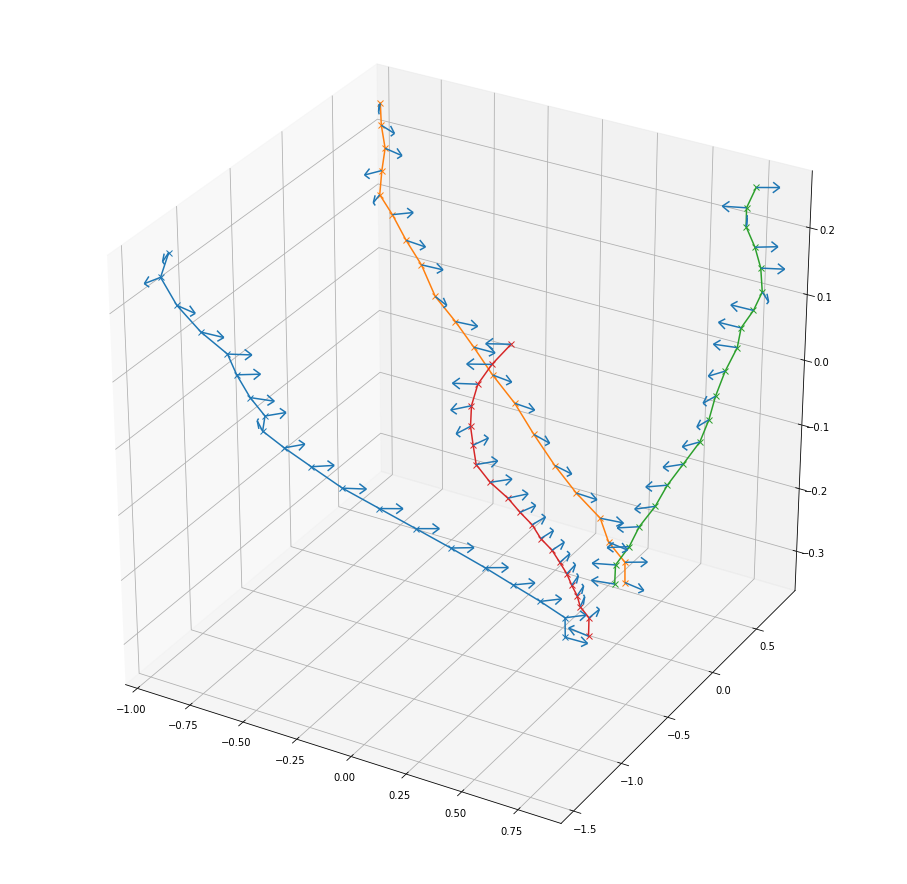

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection = '3d')

for i in range(len(handles)):
    trajectory = (np.cumsum(param_v.detach().numpy()[:,i,:]*0.125,axis=0) + flat_mesh.vertices[handles[i]]).T
    grad = (param_v.detach().numpy()[:,i,:]).T
    ax.plot(trajectory[0], trajectory[1], trajectory[2], marker = 'x')
    ax.quiver(trajectory[0], trajectory[1], trajectory[2], grad[0], grad[1], 0.0, length=0.1, normalize=True) #set z component to 0 to better visualize other gradients. this seems useful

plt.show()